# Interpolación de trazadores cúbicos

Examen: comparar el trazador cubico hecho con la función interp1d de python

Integrantes:

*De la Cruz Echeveste Oscar 

*Miranda Bustos Luis Fernando

*Obregon Fernanda 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab
import scipy.misc as sci
from scipy.interpolate import interp1d

In [2]:
def traz_cub(x_i,y_i):

    n = len(x_i)
    a = y_i
    h = np.zeros(n-1, dtype = float)
    alfa = np.zeros(n-1, dtype = float)
    
    for i in range(n-1):
        h[i] = (x_i[i+1]-x_i[i])
        
    for i in range(1,n-1,1):
        alfa[i] =((3/h[i])*(a[i+1]-a[i]))-((3/h[i-1])*(a[i]-a[i-1]))

    l = np.zeros(n,dtype = float)
    mu = np.zeros(n,dtype = float)
    z = np.zeros(n,dtype = float)
    
    l[0] = 1
    mu[0] = 0
    z[0] = 0
    
    c = np.zeros(n,dtype = float)
    b = np.zeros(n-1,dtype = float)
    d = np.zeros(n-1,dtype = float)
    for i in range(1,n-1,1):
        l[i] = (2*(x_i[i+1]-x_i[i-1]))-(h[i-1]*mu[i-1])
        mu[i] = h[i]/l[i]
        z[i] = (alfa[i]-(h[i-1]*z[i-1]))/l[i]
    
    l[n-1] = 1.
    z[n-1] = 0.
    c[n-1] = 0.
    for i in range(n-1):
        j = n-2-i
        c[j] = z[j]-(mu[j]*c[j+1])
        d[j] = (c[j+1]-c[j])/(3*h[j])
        b[j] = -c[j]*h[j]-d[j]*h[j]**2 + ((1/h[j])*(y_i[j+1]-y_i[j]))

    s = []
    x = []
    for i in range(n-1):
        x.append(np.linspace(x_i[i],x_i[i+1],10000))
        s.append(a[i] + b[i]*(x[i]-x_i[i]) + c[i]*(x[i]-x_i[i])**2 + d[i]*(x[i]-x_i[i])**3)
    return (x,s)

#### Datos a ingresar:

In [18]:
data = np.loadtxt('psi_star.dat').T

x_i = data[0][5:17]
y_i = data[1][5:17]

uso de la función:

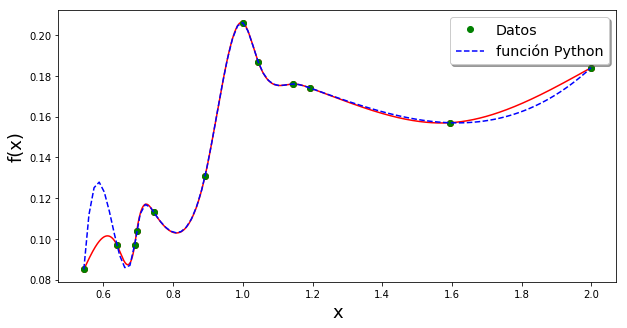

In [19]:
x, S = traz_cub(x_i,y_i)

f2 = interp1d(x_i, y_i, kind='cubic')
xnew = np.linspace(np.min(x_i),np.max(x_i), num=100, endpoint=True)

plt.figure(figsize=(10,5))
plt.plot(x_i,y_i,'ro')
for i in range(len(x)):
    plt.plot(x[i],S[i],"r-")
plt.plot(x_i, y_i, 'go',label='Datos')
plt.plot(xnew, f2(xnew), 'b--',label='función Python' )
plt.xlabel("x",fontsize=18)
plt.ylabel("f(x)",fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()